# Pymaceuticals Inc.
---

### Analysis

- The presence of only a single anomaly throughout the entirety of the research adds to its credibility and robustness.
- From our interpretation of the Box Plots, Capomulin and Ramicane appear to demonstrate greater efficacy in comparison to Infubinol and Ceftamin. The performance of Capomulin and Ramican appears to be on par with each other.
- We have not analyzed the differential effects of the drugs on male versus female mice. Thus, we are unable to determine if there is any significant difference in drug effectiveness across the two sexes.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Displaying the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_mouse_data['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_mouse_data[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = duplicate_rows['Mouse ID'].unique()[0]
duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == duplicate_mouseID]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = pd.DataFrame(combined_mouse_data.loc[combined_mouse_data['Mouse ID'] != duplicate_mouseID])
combined_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [22]:
# Grouping data by drug regimen
by_regimen = combined_data_clean.groupby('Drug Regimen')

# Calculating mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_vol_mean = by_regimen.mean()['Tumor Volume (mm3)']
tumor_vol_median = by_regimen.median()['Tumor Volume (mm3)']
tumor_vol_variance = by_regimen.var()['Tumor Volume (mm3)']
tumor_vol_std_dev = by_regimen.std()['Tumor Volume (mm3)']
tumor_vol_std_err = by_regimen.sem()['Tumor Volume (mm3)']

# Creating new DataFrame from the series
tumor_vol_stats = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean, 'Median Tumor Volume': tumor_vol_median,
                               'Tumor Volume Variance': tumor_vol_variance, 'Tumor Volume Std. Dev.': tumor_vol_std_dev,
                               'Tumor Volume Std. Err.': tumor_vol_std_err})

# Displaying tumor volume statistics by drug regimen
tumor_vol_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_vol_stats_using_agg = combined_data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_stats_using_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

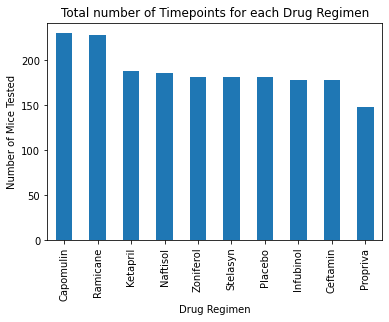

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_by_regimen = by_regimen['Timepoint'].count().sort_values(ascending=False)
timepoints_by_regimen.plot(kind='bar')
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.title('Total number of Timepoints for each Drug Regimen')
plt.show()

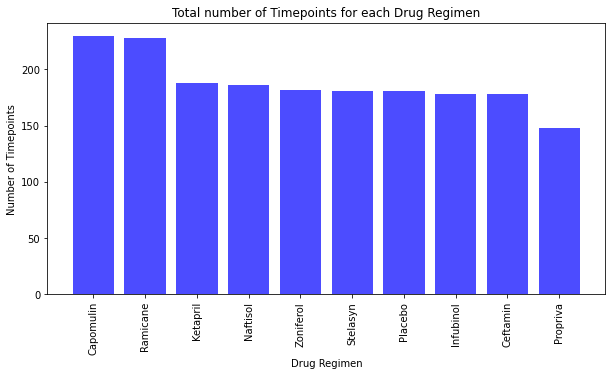

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_by_regimen = by_regimen['Timepoint'].count().sort_values(ascending=False)

# Create lists for x and y values
x_values = timepoints_by_regimen.index.tolist()
y_values = timepoints_by_regimen.values.tolist()

plt.figure(figsize=[10,5]) # You can adjust the size of the plot
plt.bar(x_values, y_values, color='b', alpha=0.7) # You can adjust the color and transparency
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Total number of Timepoints for each Drug Regimen')
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
plt.show()

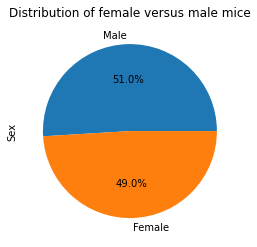

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = combined_data_clean['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of female versus male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped = combined_data_clean.groupby(['Mouse ID'])
max_timepoint_series = grouped['Timepoint'].max()
max_timepoint_series
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_series, combined_data_clean, how='inner', on=['Mouse ID', 'Timepoint'])

In [32]:
# Put treatments into a list for for loop (and later for plot labels)

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []




# Loop to add volumes to list and determine and print IQR and outliers for each regimen
for regimen in regimens:
    regimen_df = merged_df.loc[merged_df['Drug Regimen'] == regimen]
    current_volumes = regimen_df['Tumor Volume (mm3)']
    tumor_volumes.append(current_volumes)
    quartiles = current_volumes.quantile([.25,.5,.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    IQR = upperquart-lowerquart
    lower_bound = lowerquart - (1.5*IQR)
    upper_bound = upperquart + (1.5*IQR)
    outliers = regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] > upper_bound) | (regimen_df['Tumor Volume (mm3)'] < lower_bound)]
    print(f"{regimen} IQR is {IQR} \n{regimen}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulin IQR is 7.781863460000004 
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR is 9.098536719999998 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR is 11.477135160000003 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR is 15.577752179999997 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


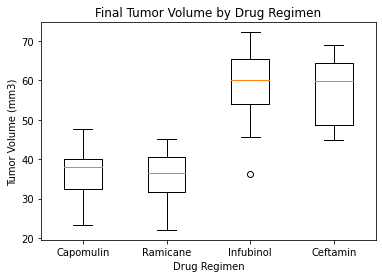

In [45]:
# Create a figure and axis
fig, ax = plt.subplots()

# Generate the box plot
ax.boxplot(tumor_volumes, labels=regimens)

# Set the title and labels
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

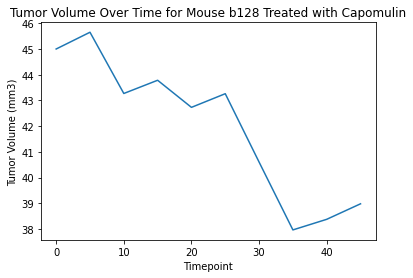

In [47]:
# Generating line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = combined_data_clean[combined_data_clean['Mouse ID'] == 'b128']

# Generate the plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the title and labels
plt.title('Tumor Volume Over Time for Mouse b128 Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


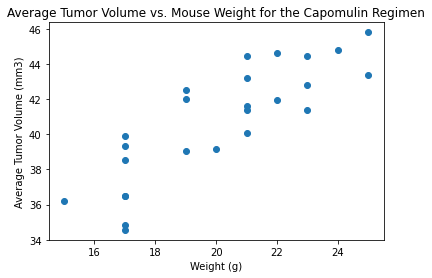

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data_clean[combined_data_clean['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate averages
average_data = capomulin_data.groupby('Mouse ID').mean()

# Generate scatter plot
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Set title and labels
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694717
The linear regression equation is y = 0.9544396890241045x + 21.55216053268501


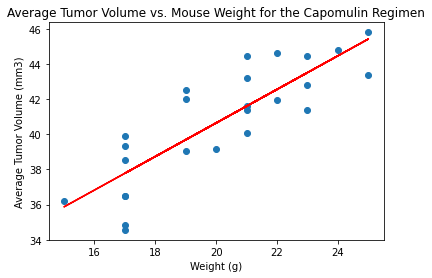

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin
capomulin_data = combined_data_clean[combined_data_clean['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate averages
average_data = capomulin_data.groupby('Mouse ID').mean()

# Calculate the correlation coefficient
correlation = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")

# Calculate linear regression
(slope, intercept) = np.polyfit(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], 1)
print(f"The linear regression equation is y = {slope}x + {intercept}")

# Plotting the scatter plot with the linear regression line
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
plt.plot(average_data['Weight (g)'], slope * average_data['Weight (g)'] + intercept, color='red') #regression line
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.show()